In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pyjags


import pandas as pd


In [15]:
# pyjags docs intro demo
np.random.seed(0)
np.set_printoptions(precision=1)

N = 500
a = 70
b = 4
sigma = 50

k = 9
n = 10

code = '''
model{
theta ~ dunif(0,1) # the uniform prior for updating by the data
k ~ dbin(theta,n) # the data; in our example, k = 9 and n = 10
}
'''

model = pyjags.Model(code=code, data=dict(k=k, n=n), chains=4)
samples = model.sample(100, vars=['theta'])

def summary(samples, varname, p=95):
    values = samples[varname]
    ci = np.percentile(values, [100-p, p])
    print('{:<6} mean = {:>5.1f}, {}% credible interval [{:>4.1f} {:>4.1f}]'.format(
      varname, np.mean(values), p, *ci))

for varname in ['theta']:
    summary(samples, varname)
    


adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 400 of 400, elapsed 0:00:00, remaining 0:00:00
theta  mean =   0.8, 95% credible interval [ 0.7  1.0]


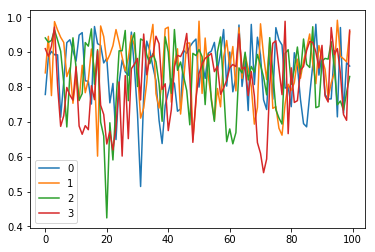

In [16]:

#print(samples['theta'][0])
df = pd.DataFrame(samples['theta'][0])
df.plot()

Below is just the sample code from `pyjags` docs

when we define our model,w e can either write it out as a string or direct the model class to the file path using, eg, `file='democode.txt`.

In [8]:
# pyjags docs intro demo
np.random.seed(0)
np.set_printoptions(precision=1)

N = 500
a = 70
b = 4
sigma = 50

x = np.random.uniform(0, 100, size=N)
y = np.random.normal(a + x*b, sigma, size=N)

code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dunif(-1e3, 1e3)
    beta ~ dunif(-1e3, 1e3)
    tau <- 1 / sigma^2
    sigma ~ dgamma(1e-4, 1e-4)
}
'''

model = pyjags.Model(file='democode.txt', data=dict(x=x, y=y, N=N), chains=4)
samples = model.sample(50, vars=['alpha', 'beta', 'sigma'])

def summary(samples, varname, p=95):
    values = samples[varname]
    ci = np.percentile(values, [100-p, p])
    print('{:<6} mean = {:>5.1f}, {}% credible interval [{:>4.1f} {:>4.1f}]'.format(
      varname, np.mean(values), p, *ci))

for varname in ['alpha', 'beta', 'sigma']:
    summary(samples, varname)

adapting: iterations 4000 of 4000, elapsed 0:00:03, remaining 0:00:00
sampling: iterations 200 of 200, elapsed 0:00:00, remaining 0:00:00
alpha  mean =  63.7, 95% credible interval [55.9 72.7]
beta   mean =   4.0, 95% credible interval [ 3.9  4.1]
sigma  mean =  49.4, 95% credible interval [47.1 51.6]
